In [2]:
import pandas as pd
import numpy as np

### 学习如何使用pandas 中的 map, apply, mapapply方法
https://zhuanlan.zhihu.com/p/100064394

#### 数据示例

In [33]:
boolean=[True,False]
gender=["男","女"]
color=["white","black","yellow"]
data=pd.DataFrame({
    "height":np.random.randint(150,190,100),
    "weight":np.random.randint(40,90,100),
    "smoker":[boolean[x] for x in np.random.randint(0,2,100)],
    "gender":[gender[x] for x in np.random.randint(0,2,100)],
    "age":np.random.randint(15,90,100),
    "color":[color[x] for x in np.random.randint(0,len(color),100) ]
}
)

data

,height,weight,smoker,gender,age,color
0,154,82,True,女,31,white
1,180,43,True,女,53,yellow
2,176,68,False,男,44,white
3,168,43,True,男,27,white
4,184,74,True,男,23,yellow
...,...,...,...,...,...,...
95,187,42,True,男,51,white
96,169,65,False,女,18,black
97,157,81,True,女,33,yellow
98,181,74,False,女,78,black


#### 1. 如何在 Series中使用map 与 apply函数
现在需要将数据中的gender 列中的男女换为为 one hot表示形式, 即0, 1 使用map函数即可
map函数可以将 列中所以的元素 **挨个映射**到对应**字典**或者**函数**中取

In [35]:
data['gender2'] = data['gender'].map({'男':1, '女':0})
print(data['gender'].tolist(), data['gender2'].tolist())

['女', '女', '男', '男', '男', '男', '男', '女', '女', '男', '女', '男', '男', '男', '女', '女', '男', '女', '女', '男', '男', '男', '女', '女', '男', '男', '男', '男', '男', '男', '男', '男', '女', '男', '男', '女', '女', '女', '女', '女', '男', '男', '男', '女', '女', '女', '女', '男', '男', '男', '女', '男', '女', '女', '男', '女', '女', '女', '男', '女', '女', '女', '男', '女', '女', '女', '女', '女', '男', '男', '男', '男', '男', '男', '男', '男', '男', '男', '男', '男', '女', '女', '男', '女', '男', '男', '女', '女', '女', '女', '女', '男', '女', '女', '女', '男', '女', '女', '女', '男'] [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]


当然一些更负载的数据操作可以使用可以使用函数和lambda函数

In [53]:
data['gender3'] = data['gender'].map(lambda x: 'man' if x == '男' else 'women')
data['gender3']

0     women
1     women
2       man
3       man
4       man
      ...  
95      man
96    women
97    women
98    women
99      man
Name: gender3, Length: 100, dtype: object

In [50]:
data.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

基本原理如下图所视
不论是利用字典还是函数进行映射，map方法都是把对应的数据逐个当作参数传入到字典或函数中，得到映射后的值
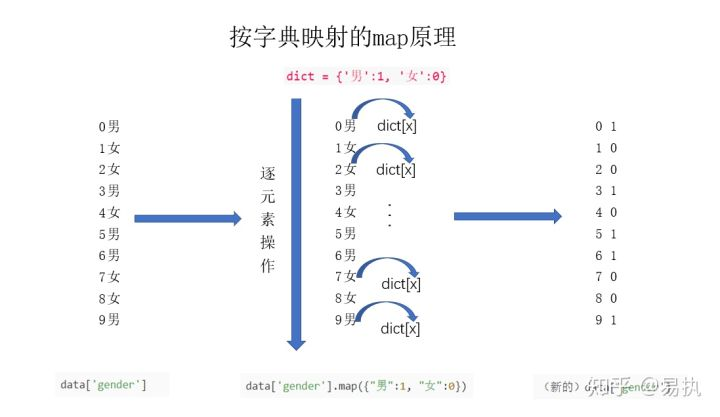

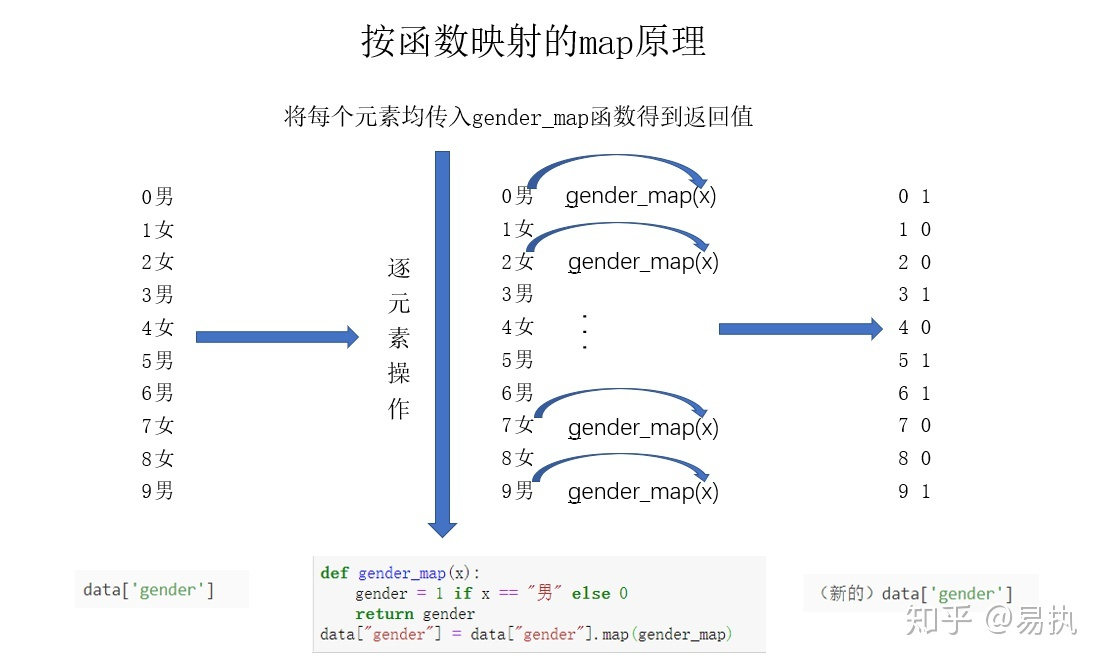


#### 2. apply 
相较于map, apply可以使用更复杂的函数作用于dataframe或者Series
例如传入在选着参数时, apply可以选着多参数传入

In [56]:
def apply_age(x, bias):
    return x+bias

data['age1'] = data['age'].apply(apply_age, args=(-3, ))
data['age1']

0    28
1    50
2    41
3    24
4    20
Name: age1, dtype: int64

### dataframe 格式的 apply 和 map 和 mapapply
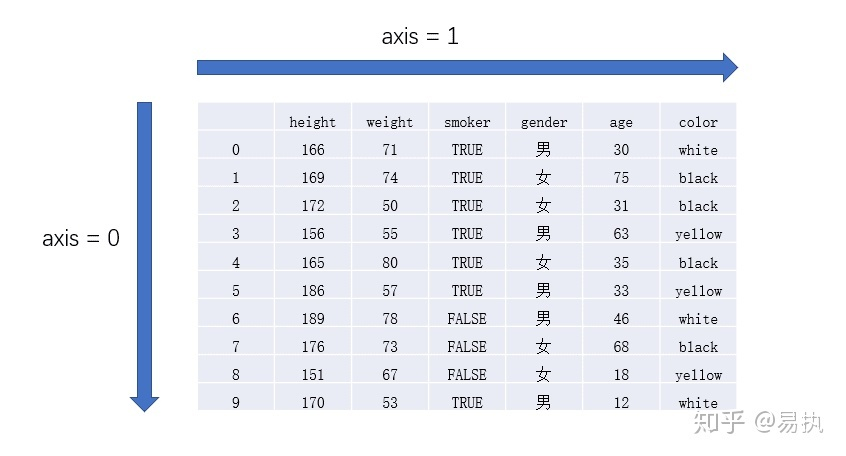

In [67]:
#apply 函数对dataframe的操作

# 沿o轴求和
# raw 函数为转为np设置的函数, 可以返回ndarray
#  result_type='broadcast', 加入result_type可以强行将series转为dataframe
s1 = data[['height', 'weight', 'age']].apply(np.sum, raw=False, axis=0)

s1

pandas.core.series.Series

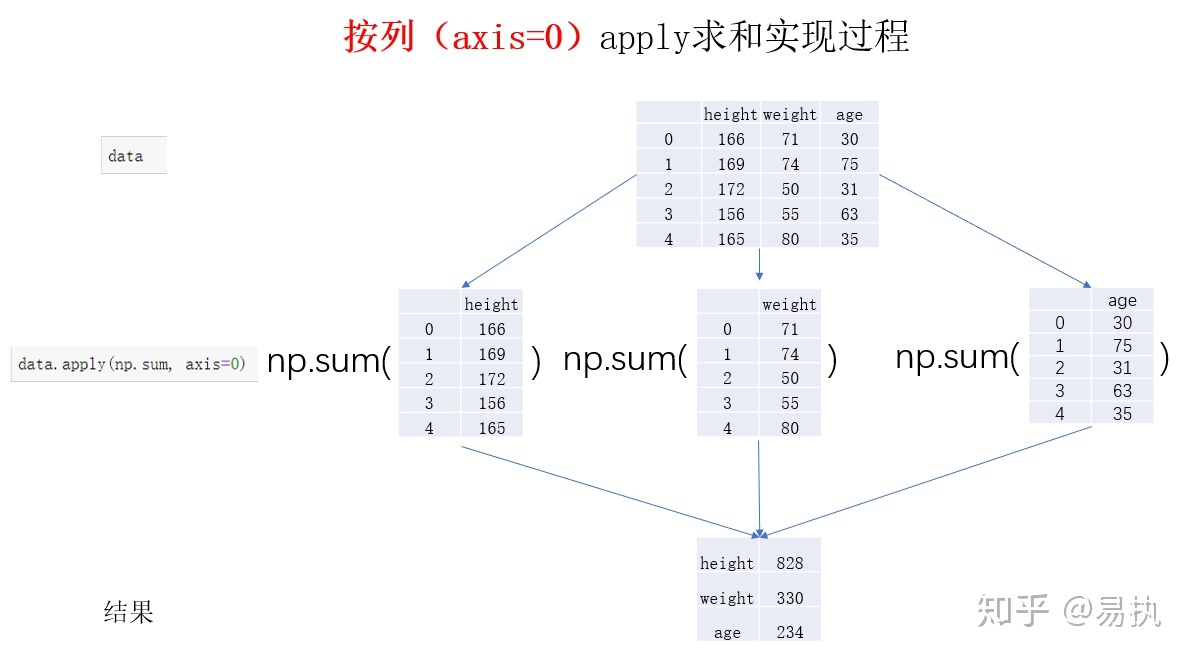

In [69]:
s2 =  data[['height', 'weight', 'age']].apply(np.log, raw=True, axis=0)

s2

,height,weight,age
0,5.036953,4.406719,3.433987
1,5.192957,3.761200,3.970292
2,5.170484,4.219508,3.784190
3,5.123964,3.761200,3.295837
4,5.214936,4.304065,3.135494
...,...,...,...
95,5.231109,3.737670,3.931826
96,5.129899,4.174387,2.890372
97,5.056246,4.394449,3.496508
98,5.198497,4.304065,4.356709


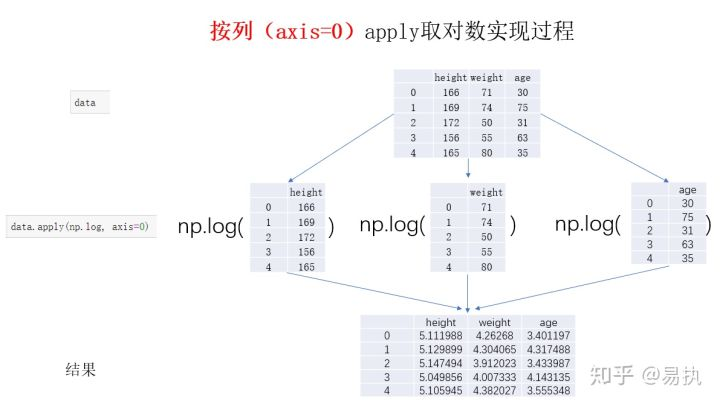

#### 例, 当axis==1时, 计算BMI

In [72]:
def BMI(series):
    weight = series['weight']
    height = series['height']
    BMI = weight / height**2
    return BMI

data['BMI'] = data.apply(BMI, axis=1)

data['BMI'].head()

0    0.003458
1    0.001327
2    0.002195
3    0.001524
4    0.002186
Name: BMI, dtype: float64

当apply设置了axis=1对行进行操作时，会默认将每一行数据以Series的形式（Series的索引为列名）传入指定函数，返回相应的结果
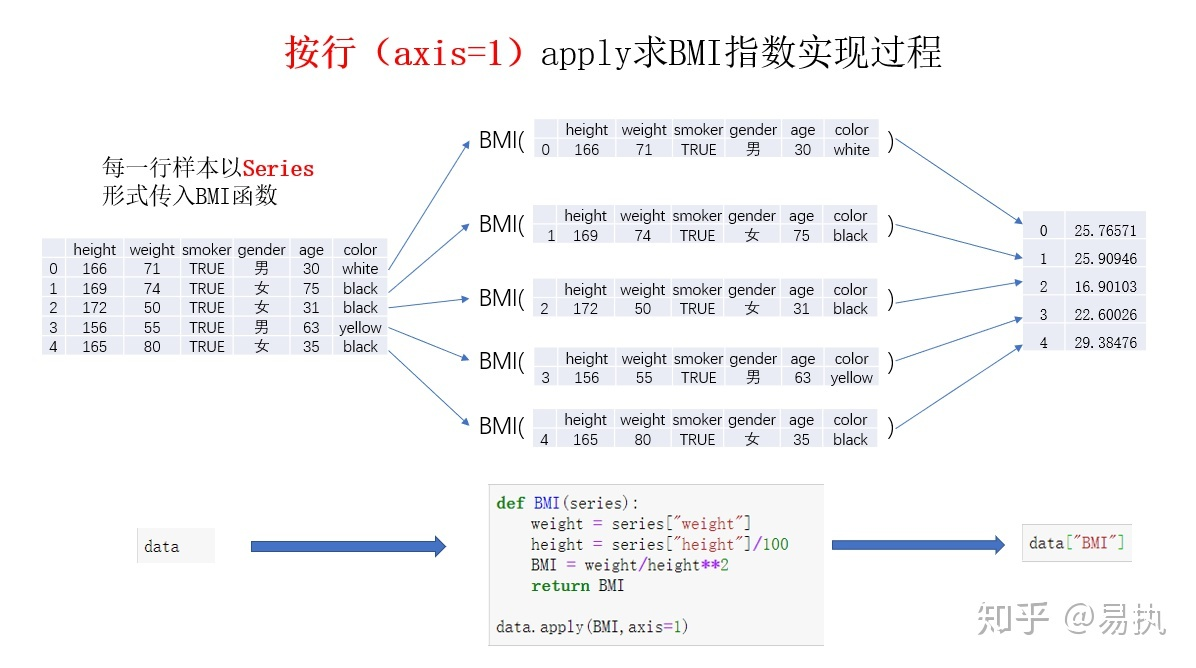

#### applymap 更为简单粗暴, dataframe中所有与元素挨个遍历
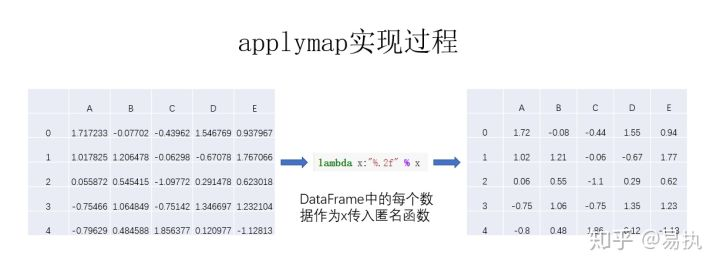

In [73]:
df = pd.DataFrame({i:np.random.randn(5) for i in range(5)})

df

,0,1,2,3,4
0,1.000474,2.486650,0.495889,-0.133537,0.097536
1,-0.216262,-1.433480,0.391059,-1.515545,-3.112582
2,0.570779,1.268342,-0.125984,-0.081378,-0.804219
3,0.050629,1.215041,-0.198043,0.447865,0.306154
4,-0.815460,1.105142,-1.165583,0.304295,-0.039107


In [76]:
df.applymap(lambda x: "%.2f" % x)


,0,1,2,3,4
0,1.00,2.49,0.50,-0.13,0.10
1,-0.22,-1.43,0.39,-1.52,-3.11
2,0.57,1.27,-0.13,-0.08,-0.80
3,0.05,1.22,-0.20,0.45,0.31
4,-0.82,1.11,-1.17,0.30,-0.04
